In [ ]:
import tensorflow as tf
import cv2
from tensorflow import keras
from numpy import asarray, argmax
from matplotlib import pyplot

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
model = tf.keras.models.load_model("/home/jovyan/model/CNN_Fashion_Colab_Model01")

2022-09-25 08:31:39.863128: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


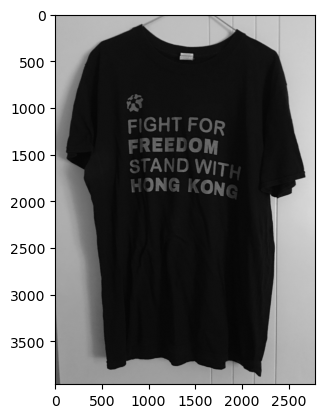

Before preprossing, img.shape =  (3961, 2787)


In [ ]:
# Read an external image
img = cv2.imread('/home/jovyan/input/fashion_example01.jpg', cv2.IMREAD_GRAYSCALE)
# cv2.imshow('Example', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
pyplot.figure()
pyplot.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
pyplot.show()
print("Before preprossing, img.shape = ", img.shape)

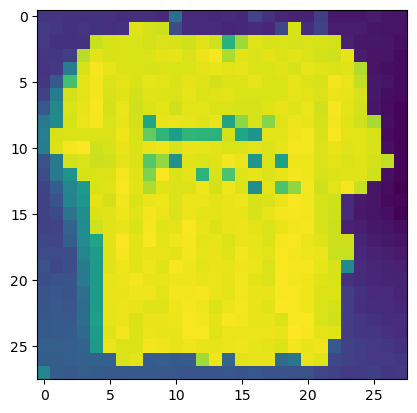

In [ ]:
# Resize and negate the image
imgsize = 28
img = cv2.bitwise_not(img)
img = cv2.resize(img, (imgsize, imgsize))
# cv2.imshow('Reduced', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
pyplot.figure()
pyplot.imshow(img)
pyplot.show()

In [ ]:
# Reshape the image for the CNN fashion model
img = tf.expand_dims(img, -1)
img = tf.divide(img, 255)
img = tf.reshape(img, [1, imgsize, imgsize, 1])
print("After preprossing, img.shape = ", img.shape)

After preprossing, img.shape =  (1, 28, 28, 1)


In [ ]:
# Predict about the image
yhat = model.predict(asarray(img))
print("yhat = ", yhat)
print('Predicted: class = %s' % class_names[argmax(yhat)])

1/1 [==============================] - 0s 157ms/step
yhat =  [[0.35990104 0.00091813 0.2061069  0.00577071 0.00586795 0.00233132
  0.31816164 0.00153746 0.09758259 0.00182224]]
Predicted: class = T-shirt/top
